In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data
df=pd.read_csv("D:\\ML Data\\Big_Mart_Train.csv")
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2652,FDV57,15.25,Regular,0.065897,Snack Foods,179.2660,OUT046,1997,Small,Tier 1,Supermarket Type1,1438.1280
6628,FDS57,NaN,Low Fat,0.102941,Snack Foods,142.0470,OUT027,1985,Medium,Tier 3,Supermarket Type3,2719.7930
3684,FDV38,19.25,Low Fat,0.101689,Dairy,54.6956,OUT013,1987,High,Tier 3,Supermarket Type1,163.7868
359,FDJ56,NaN,Low Fat,0.182515,Fruits and Vegetables,98.7700,OUT027,1985,Medium,Tier 3,Supermarket Type3,2696.4900
6223,FDT03,21.25,Low Fat,0.009999,Meat,182.3608,OUT046,1997,Small,Tier 1,Supermarket Type1,551.2824


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


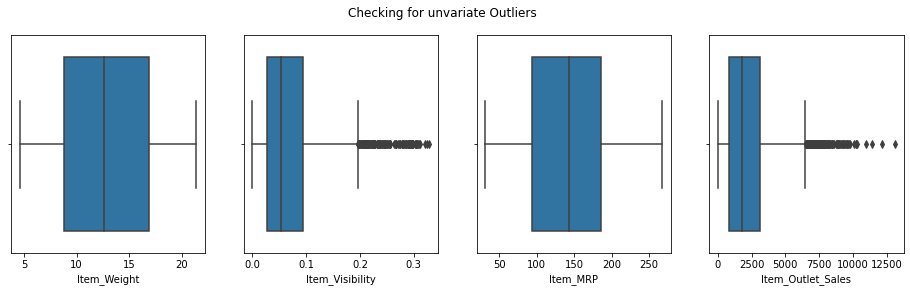

In [5]:
## Checking for Unviariate Outliers
plt.rcParams['figure.figsize']=(16,4)

plt.subplot(1,4,1)
sns.boxplot(df['Item_Weight'])

plt.subplot(1,4,2)
sns.boxplot(df['Item_Visibility'])

plt.subplot(1,4,3)
sns.boxplot(df['Item_MRP'])

plt.subplot(1,4,4)
sns.boxplot(df['Item_Outlet_Sales'])

plt.suptitle("Checking for unvariate Outliers")
plt.show()

## Bivariate Outliers

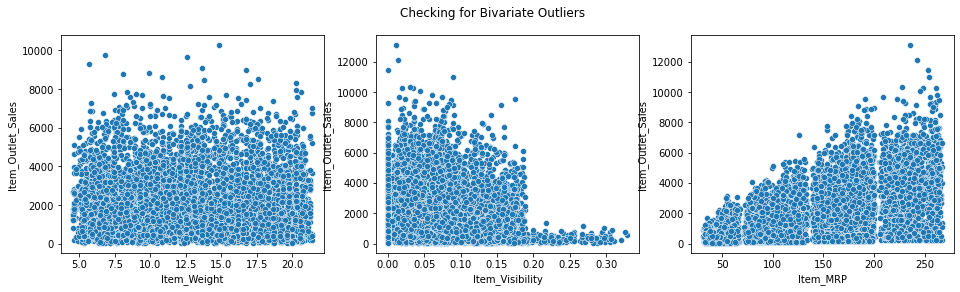

In [6]:
## Checking for Outliers wrt to target variable

plt.subplot(1,3,1)
sns.scatterplot(y=df['Item_Outlet_Sales'], x=df['Item_Weight'])

plt.subplot(1,3,2)
sns.scatterplot(y=df['Item_Outlet_Sales'], x=df['Item_Visibility'])

plt.subplot(1,3,3)
sns.scatterplot(y=df['Item_Outlet_Sales'], x=df['Item_MRP'])

plt.suptitle("Checking for Bivariate Outliers")
plt.show()

## Capping Outliers

In [7]:
## Capping the outliers in the columns Outlet_Sales having values greater than 10000
df['Item_Outlet_Sales'].values[df['Item_Outlet_Sales'].values>10000]=10000

In [8]:
## Checking if there is any values greater than 10000 left in Item_Outlet_Sales
df[df['Item_Outlet_Sales']>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
## Dealing with bivariate outliers
## We delete all the values which are greater than 8000
df=df[~(df['Item_Outlet_Sales']>8000)]

In [10]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
DRN47     9
FDV38     9
NCF42     9
         ..
FDN52     1
FDP15     1
DRF48     1
FDK57     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8473 non-null   object 
 1   Item_Weight                7046 non-null   float64
 2   Item_Fat_Content           8473 non-null   object 
 3   Item_Visibility            8473 non-null   float64
 4   Item_Type                  8473 non-null   object 
 5   Item_MRP                   8473 non-null   float64
 6   Outlet_Identifier          8473 non-null   object 
 7   Outlet_Establishment_Year  8473 non-null   int64  
 8   Outlet_Size                6071 non-null   object 
 9   Outlet_Location_Type       8473 non-null   object 
 10  Outlet_Type                8473 non-null   object 
 11  Item_Outlet_Sales          8473 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 860.5+ KB


In [12]:
df.shape

(8473, 12)

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7046.000000,8473.000000,8473.000000,8473.000000,8473.000000
mean,12.857566,0.066203,140.440450,1997.882214,2140.219090
std,4.644420,0.051663,62.008478,8.349699,1623.339454
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.771250,0.026993,93.609400,1987.000000,828.921000
50%,12.600000,0.053951,142.315400,1999.000000,1780.349200
75%,16.850000,0.094916,185.126600,2004.000000,3078.659200
max,21.350000,0.328391,266.888400,2009.000000,7968.294400


In [14]:
## Handling missing values
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1427
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2402
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
## Therefore we have to take care of Columns Item_Weight and Outlet_Size
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Item_Weight    1427
Outlet_Size    2402
dtype: int64

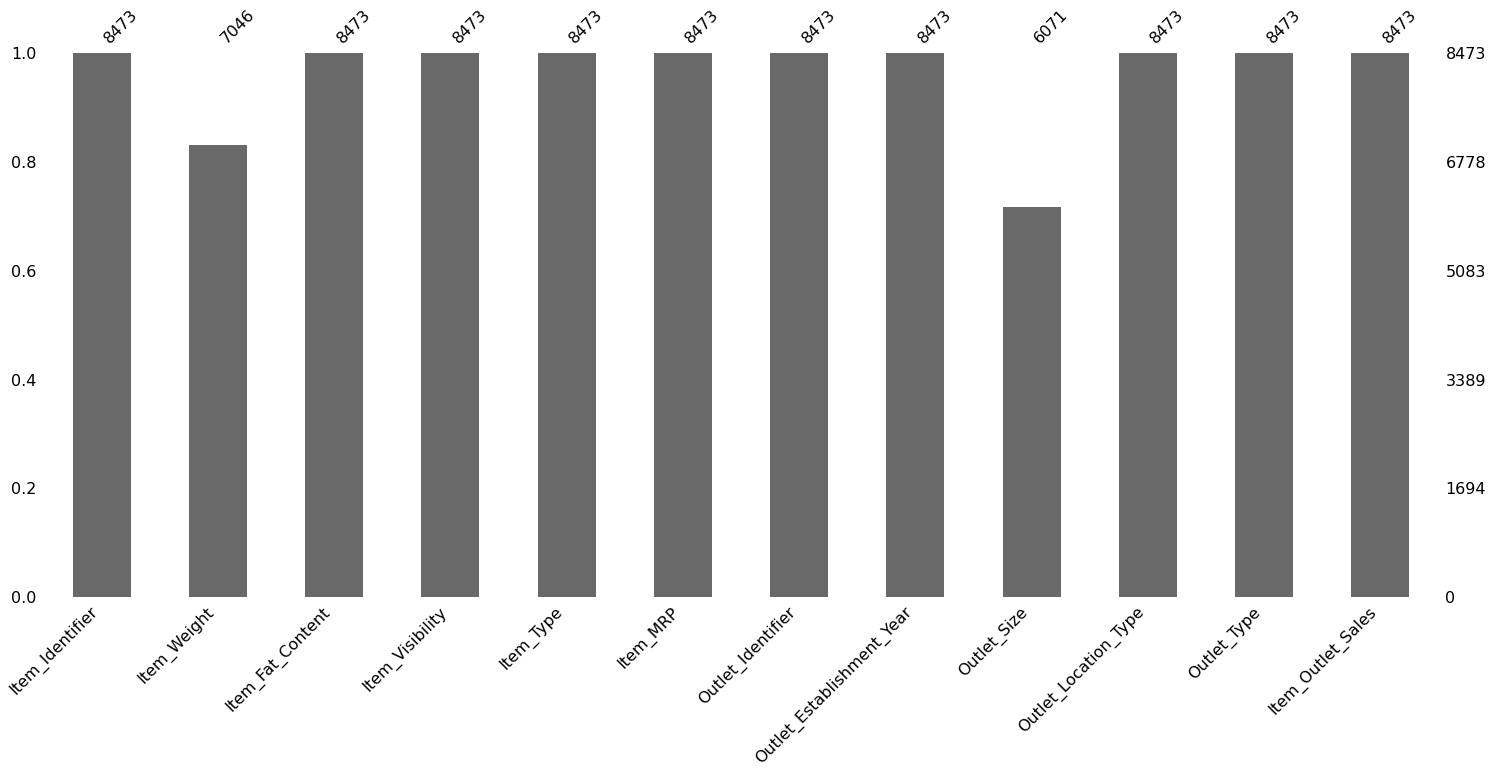

In [17]:
import missingno as msno
msno.bar(df)
plt.show()

In [18]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8473, dtype: float64

In [19]:
df["Item_Weight"].isnull().sum()/len(df)

0.1684173256225658

In [20]:
df["Outlet_Size"].isnull().sum()/len(df)

0.28348872890357607

In [21]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8473, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

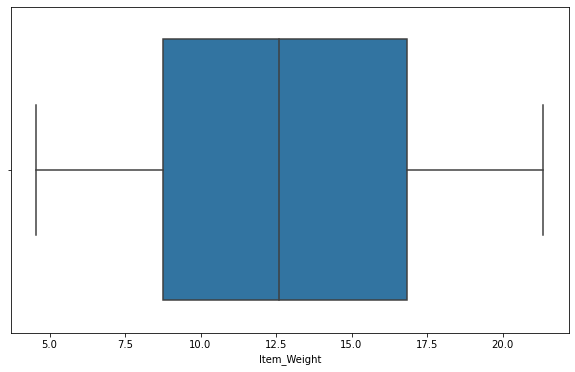

In [22]:
fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(df.Item_Weight)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

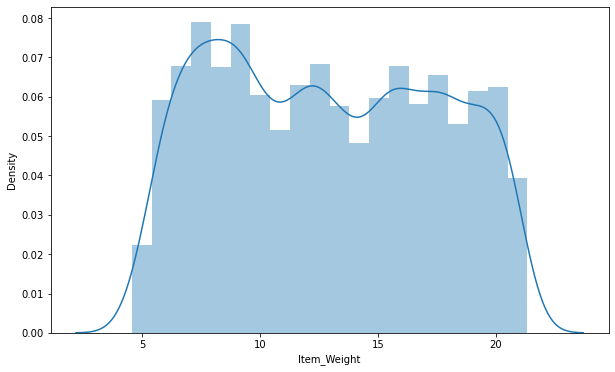

In [23]:
fig, ax= plt.subplots(figsize=(10,6))
sns.distplot(df.Item_Weight)

In [24]:
## Since Distribution is symmetric therefore we will fill values with mean
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2402
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
## Now we have to take care of Outlet_Size
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8473, dtype: object

In [27]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

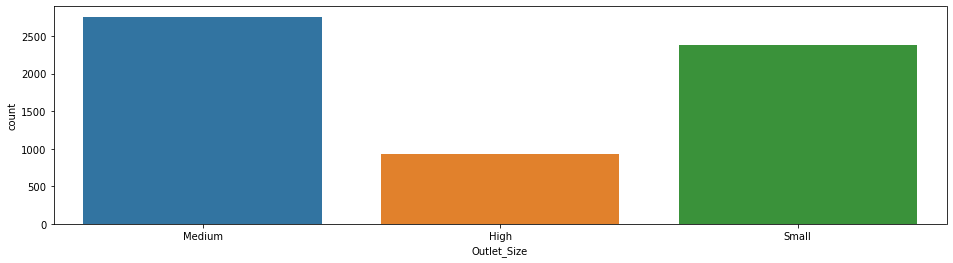

In [28]:
sns.countplot(df.Outlet_Size)

In [29]:
category=pd.crosstab(df['Item_Fat_Content'],columns='Different types of Fats')
category

col_0,Different types of Fats
Item_Fat_Content,
LF,316
Low Fat,5059
Regular,2870
low fat,111
reg,117


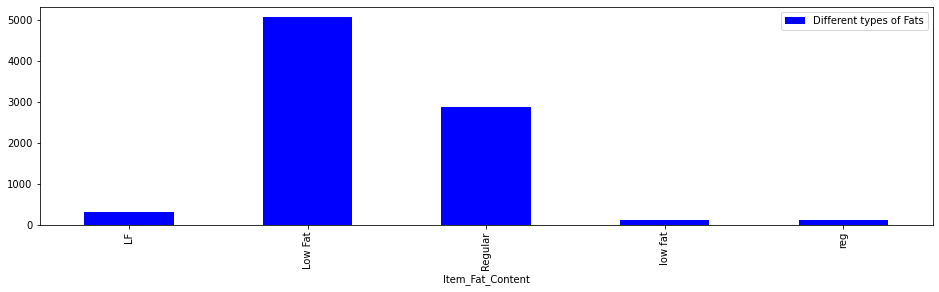

In [30]:
category.plot(kind='bar',color='b')
plt.legend()

In [31]:
## It is visible that LF,Low Fat and low fat are same, similar to regular and reg and hence have to be replaced by a single
## term
df.Item_Fat_Content=df.Item_Fat_Content.replace({"LF":"Low Fat",
                                                 "low fat":"Low Fat",
                                                 "reg":"Regular"})

In [32]:
mod_category=pd.crosstab(df['Item_Fat_Content'],columns='Different types of Fats')
mod_category

col_0,Different types of Fats
Item_Fat_Content,
Low Fat,5486
Regular,2987


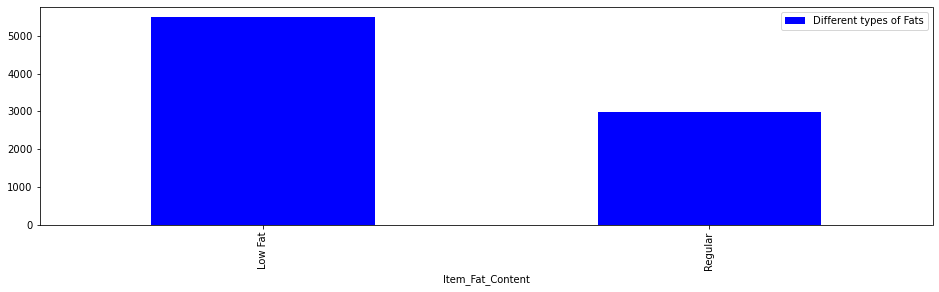

In [33]:
mod_category.plot(kind='bar',color='b')
plt.legend()

In [34]:
df.Item_Visibility.sort_values().tail(10)

5150    0.304737
3474    0.304859
6622    0.305305
7603    0.306543
4382    0.308145
2855    0.309390
7250    0.311090
1805    0.321115
3750    0.325781
854     0.328391
Name: Item_Visibility, dtype: float64

In [35]:
df.Item_Type

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8473, dtype: object

In [36]:
df.Item_Type.value_counts()

Fruits and Vegetables    1222
Snack Foods              1191
Household                 907
Frozen Foods              851
Dairy                     671
Baking Goods              648
Canned                    647
Health and Hygiene        518
Soft Drinks               442
Meat                      423
Breads                    250
Hard Drinks               214
Others                    169
Starchy Foods             147
Breakfast                 109
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:>

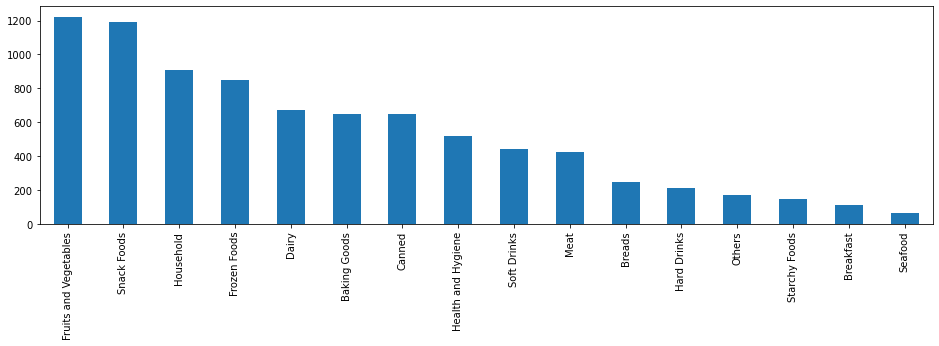

In [37]:
df.Item_Type.value_counts().plot(kind='bar')

In [38]:
df.Item_MRP

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8473, dtype: float64

In [39]:
df.Item_MRP.value_counts()

172.0422    7
170.5422    6
142.0154    6
196.5768    6
196.5084    6
           ..
125.7704    1
120.5072    1
39.6164     1
148.8076    1
75.4670     1
Name: Item_MRP, Length: 5910, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

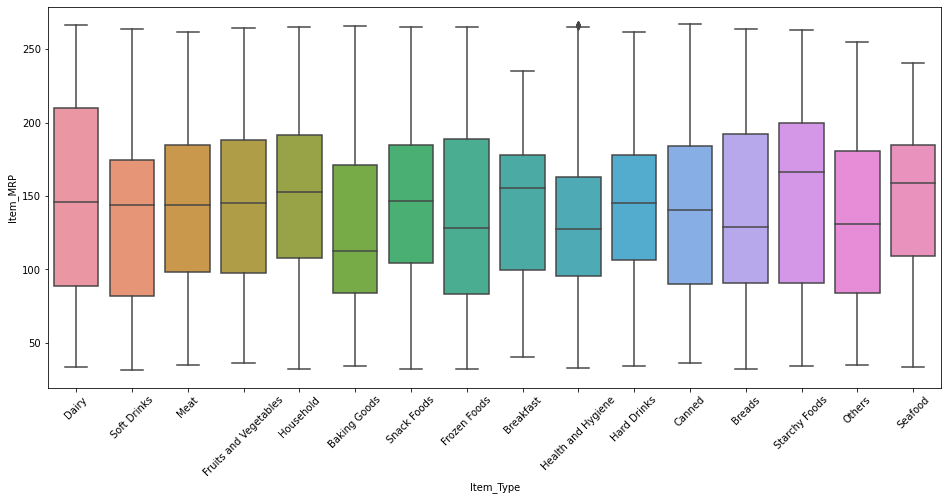

In [40]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df,x=df.Item_Type,y=df.Item_MRP)
plt.xticks(rotation=45)

In [41]:
df.Outlet_Identifier

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8473, dtype: object

In [42]:
df.Outlet_Identifier.value_counts()

OUT049    930
OUT013    930
OUT035    929
OUT018    928
OUT046    927
OUT045    925
OUT017    922
OUT027    899
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT013'),
  Text(2, 0, 'OUT035'),
  Text(3, 0, 'OUT018'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT027'),
  Text(8, 0, 'OUT010'),
  Text(9, 0, 'OUT019')])

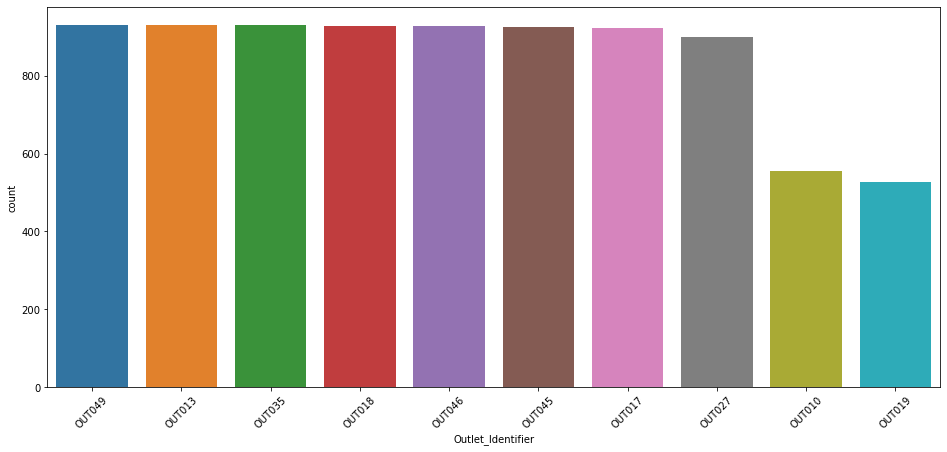

In [43]:
plt.figure(figsize=(16,7))
sns.countplot(df['Outlet_Identifier'],order=df['Outlet_Identifier'].value_counts().index)
plt.xticks(rotation=45)

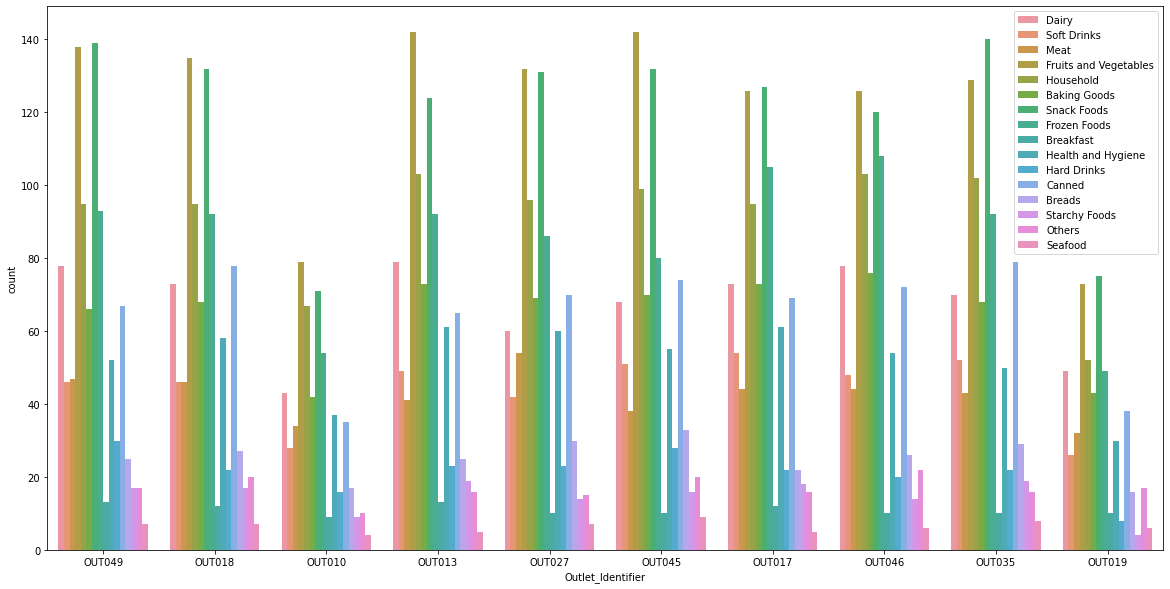

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(df['Outlet_Identifier'],hue=df['Item_Type'])
plt.legend()
plt.show()

In [45]:
df.Outlet_Establishment_Year

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8473, dtype: int64

In [46]:
df.Outlet_Establishment_Year.value_counts()

1985    1427
1999     930
1987     930
2004     929
2009     928
1997     927
2002     925
2007     922
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Text(0.5, 1.0, 'Year and count of Outlet Establishments')

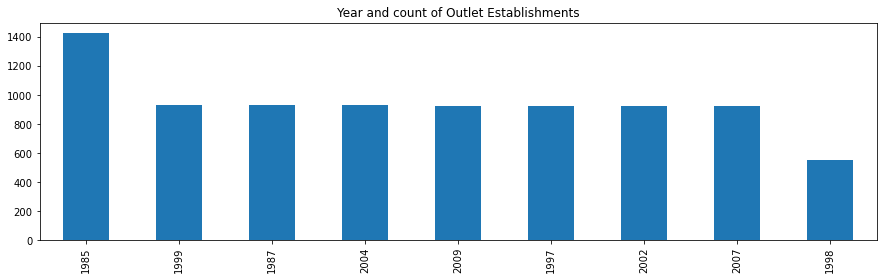

In [47]:
plt.figure(figsize=(15,4))
pd.Series(data=df['Outlet_Establishment_Year']).value_counts().plot(kind='bar')
plt.title("Year and count of Outlet Establishments")

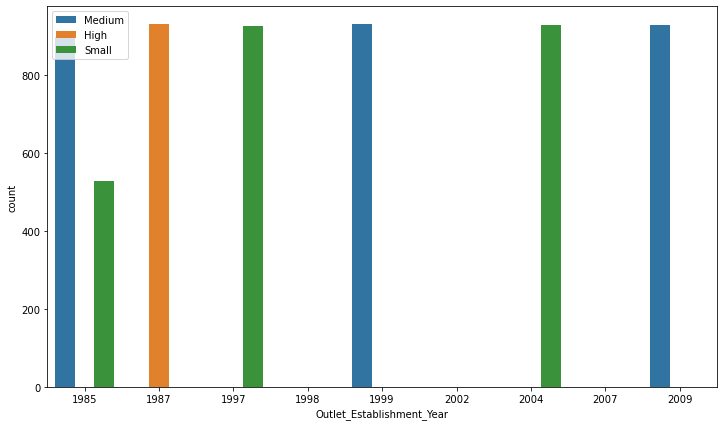

In [48]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Establishment_Year'],hue=df['Outlet_Size'])
plt.legend()
plt.show()

In [49]:
df.Outlet_Location_Type

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8473, dtype: object

In [50]:
df.Outlet_Location_Type.value_counts()

Tier 3    3312
Tier 2    2776
Tier 1    2385
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

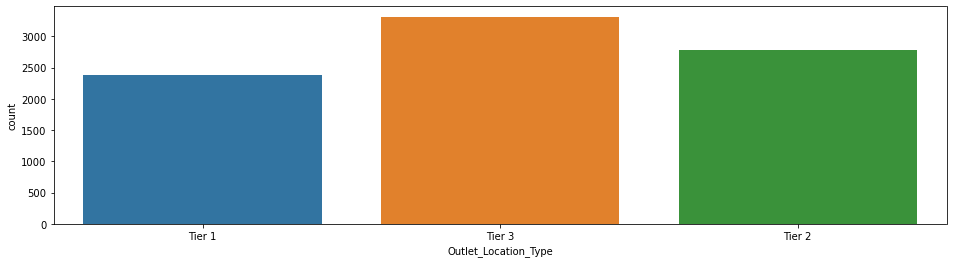

In [51]:
sns.countplot(df.Outlet_Location_Type)

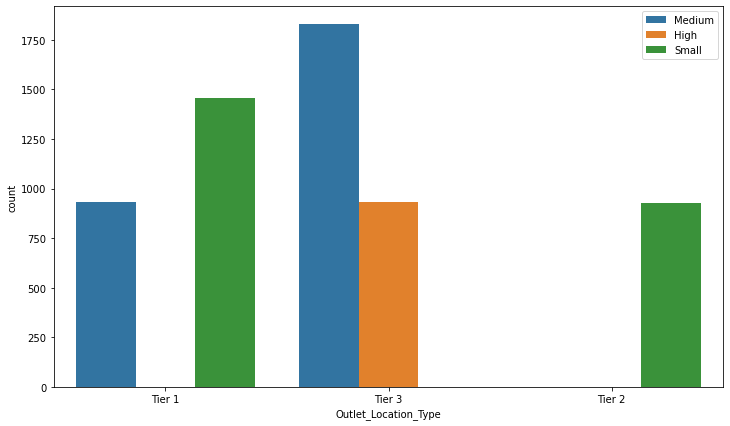

In [52]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Size'])
plt.legend()
plt.show()

In [53]:
## It can be seen that Tier 2 cities just have small sized Outlets and hence its null values can be replaced with small
## outlets
df.loc[df['Outlet_Location_Type'] == 'Tier 2', 'Outlet_Size'] = 'Small'

In [54]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [55]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

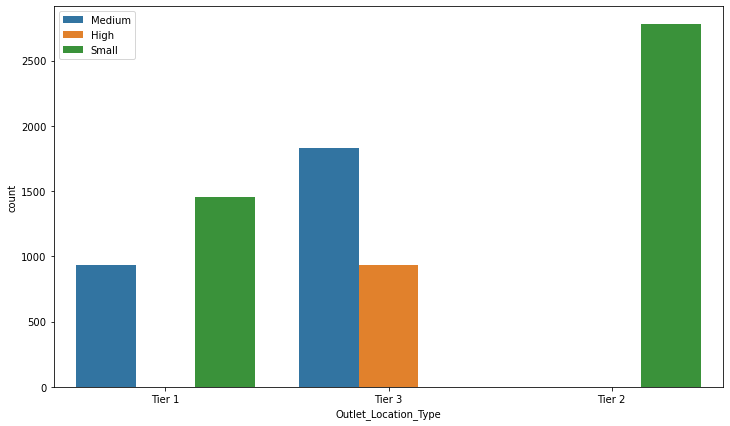

In [56]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Size'])
plt.legend()
plt.show()

In [57]:
df.Outlet_Type

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8473, dtype: object

In [58]:
df.Outlet_Type.value_counts()

Supermarket Type1    5563
Grocery Store        1083
Supermarket Type2     928
Supermarket Type3     899
Name: Outlet_Type, dtype: int64

<AxesSubplot:>

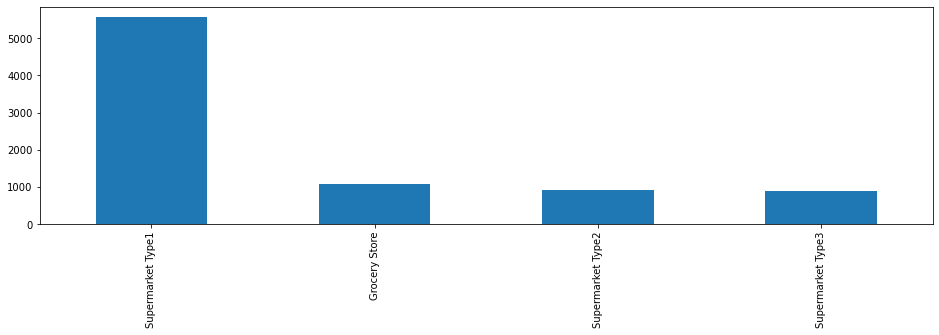

In [59]:
df.Outlet_Type.value_counts().plot(kind='bar')

In [60]:
## Hence it can be seen that Supermarket Type 1 is present the most

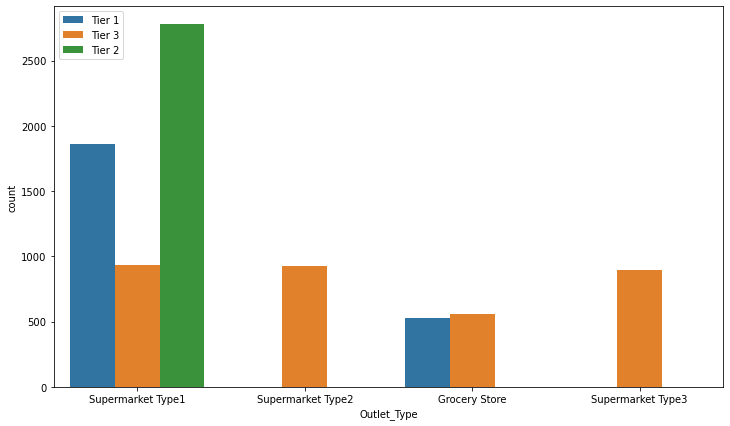

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Location_Type'])
plt.legend()
plt.show()

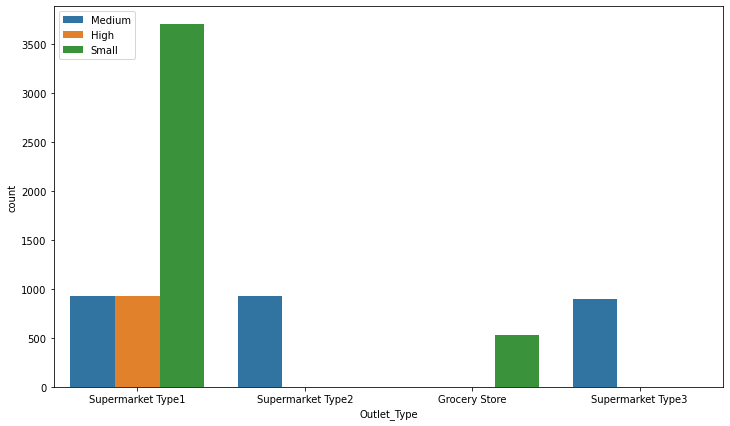

In [62]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Size'])
plt.legend()
plt.show()

In [63]:
## It can be seen that Supermarket Type 2 have outlet size as medium only and same is the case with Supermarket Type 3
## It can be also seen that Grocery Store also only have outlet size as small
## Hence they can be replaced to get rid of null values
df.loc[df['Outlet_Type'] == 'Supermarket Type 2', 'Outlet_Size'] = 'Medium'
df.loc[df['Outlet_Type'] == 'Supermarket Type 3', 'Outlet_Size'] = 'Medium'
df.loc[df['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = 'Small'

In [64]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [65]:
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [66]:
## Now our dataset has 0 null values

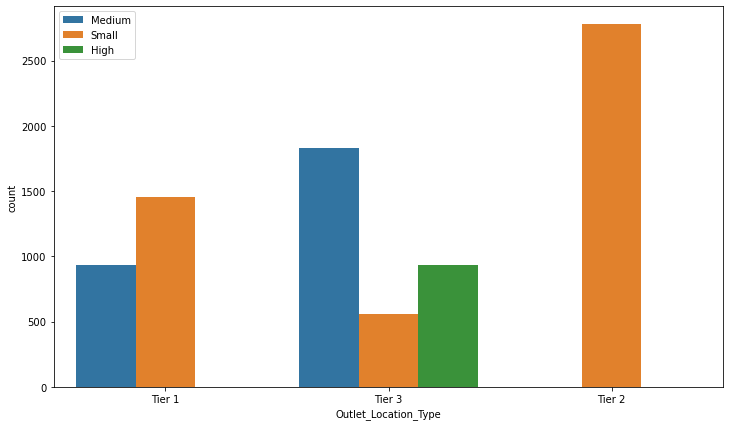

In [67]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Size'])
plt.legend()
plt.show()

In [68]:
## It can be seen that Tier 2 cities only have small sized outlets
## Only Tier 3 cities have high sized outlets

In [69]:
df.Outlet_Size.value_counts()

Small     4786
Medium    2757
High       930
Name: Outlet_Size, dtype: int64

In [70]:
df.Outlet_Size.value_counts().sum()

8473

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

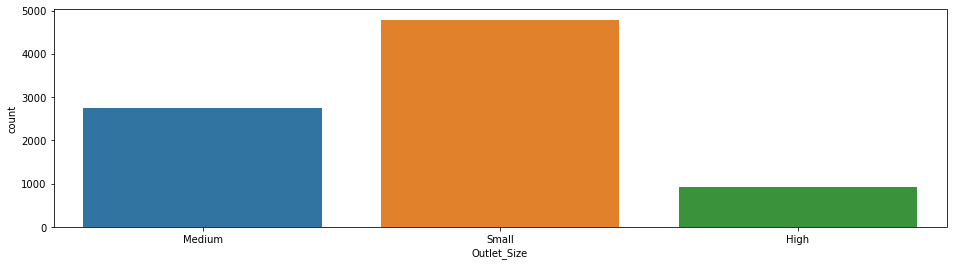

In [71]:
sns.countplot(df.Outlet_Size)

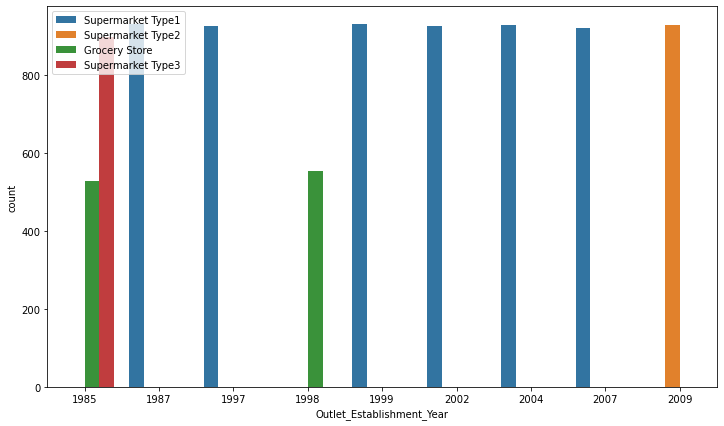

In [72]:
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Establishment_Year'],hue=df['Outlet_Type'])
plt.legend()
plt.show()

In [73]:
df.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8473, dtype: float64

In [74]:
df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1230.3984    14
             ..
6351.7320     1
2278.3676     1
1154.4972     1
7152.0236     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3444, dtype: int64

In [75]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type',aggfunc='sum')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.279239e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.121825e+06


In [76]:
df_Outlet_Type_sum=df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type',aggfunc='sum')

<AxesSubplot:xlabel='Outlet_Type'>

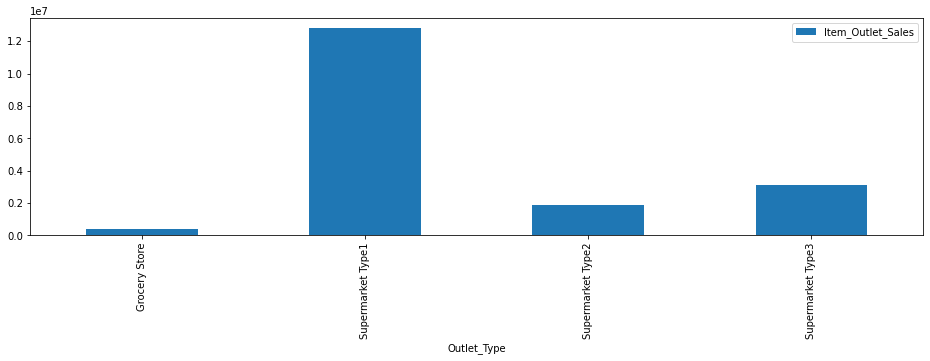

In [77]:
df_Outlet_Type_sum.plot(kind='bar')

In [78]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2299.549567
Supermarket Type2,1995.498739
Supermarket Type3,3472.552849


In [79]:
df_Outlet_Type=df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Type'>

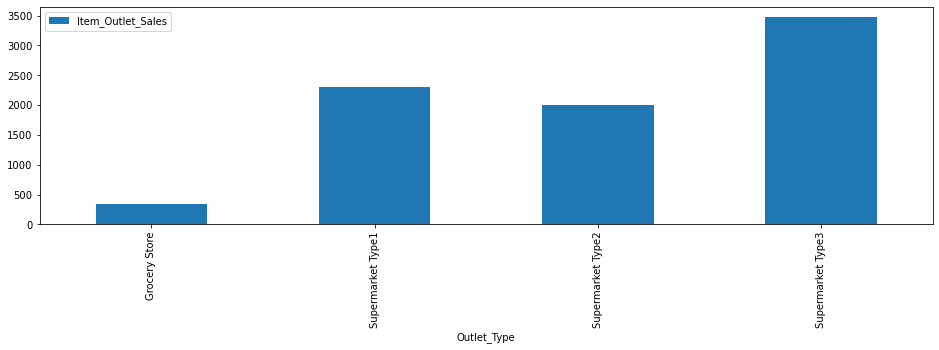

In [80]:
df_Outlet_Type.plot(kind='bar')

In [81]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type',aggfunc='sum')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,4.455638e+06
Tier 2,6.393113e+06
Tier 3,7.285325e+06


In [82]:
df_Outlet_Location_Type_sum=df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type',aggfunc='sum')

<AxesSubplot:xlabel='Outlet_Location_Type'>

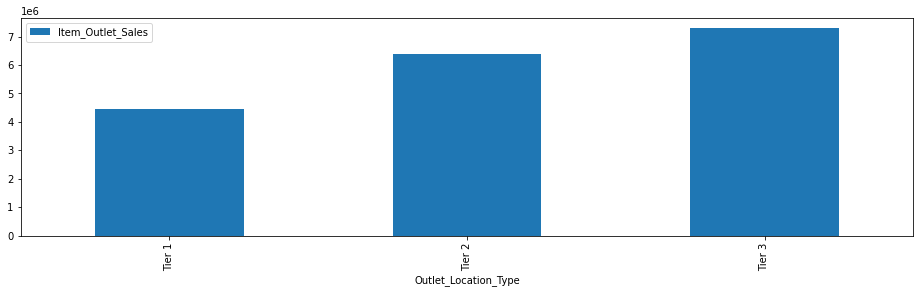

In [83]:
df_Outlet_Location_Type_sum.plot(kind='bar')

In [84]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1868.192088
Tier 2,2302.994525
Tier 3,2199.675548


In [85]:
df_Outlet_Location_Type=df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Location_Type'>

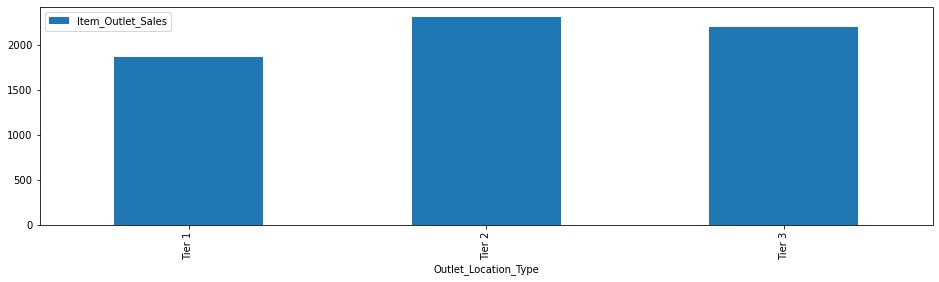

In [86]:
df_Outlet_Location_Type.plot(kind='bar')

In [87]:
df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size', aggfunc='sum')

,Item_Outlet_Sales
Outlet_Size,
High,2.123337e+06
Medium,7.157618e+06
Small,8.853121e+06


In [88]:
df_Outlet_Size_sum=df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size', aggfunc='sum')

<AxesSubplot:xlabel='Outlet_Size'>

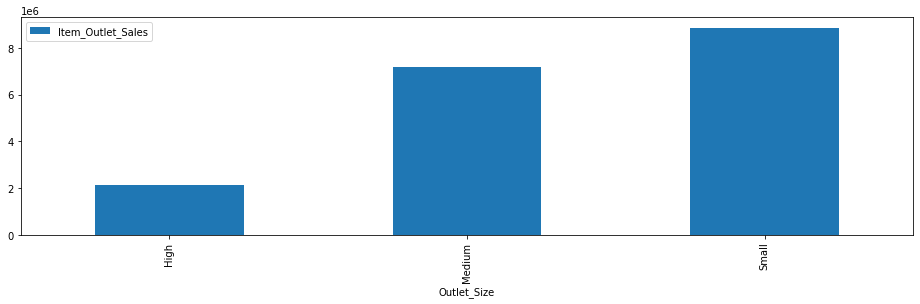

In [89]:
df_Outlet_Size_sum.plot(kind='bar')

In [90]:
df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size')

,Item_Outlet_Sales
Outlet_Size,
High,2283.158496
Medium,2596.161644
Small,1849.795507


In [91]:
df_Outlet_Size=df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Size'>

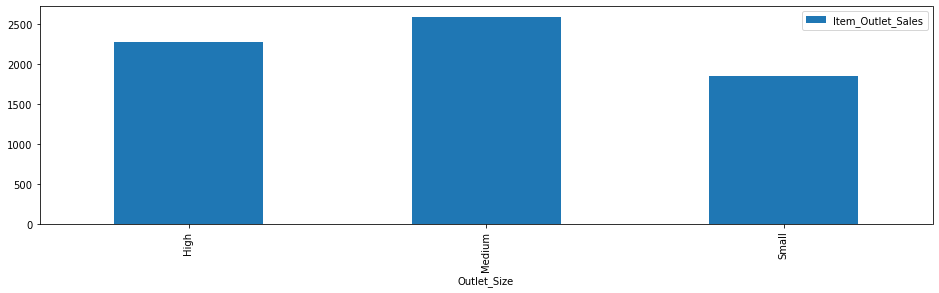

In [92]:
df_Outlet_Size.plot(kind='bar')

In [93]:
df.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content',aggfunc='sum')

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,1.161897e+07
Regular,6.515109e+06


<AxesSubplot:xlabel='Item_Fat_Content'>

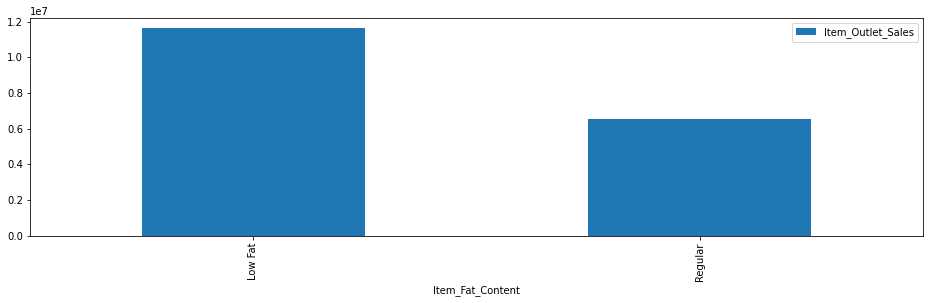

In [94]:
df.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content',aggfunc='sum').plot(kind='bar')

In [95]:
df.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content')

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2117.930675
Regular,2181.154559


<AxesSubplot:xlabel='Item_Fat_Content'>

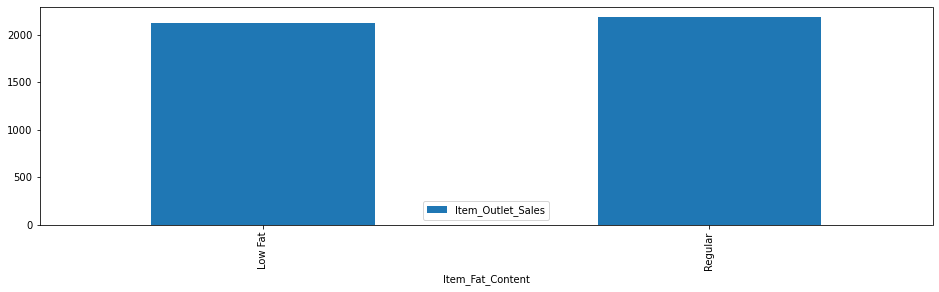

In [96]:
df.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content').plot(kind='bar')

In [97]:
df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Establishment_Year')

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2313.608343
1987,2283.158496
1997,2256.714376
1998,339.351662
1999,2348.354635
2002,2164.271074
2004,2432.339404
2007,2311.842464
2009,1995.498739


# Conclusions

1. Item Outlet sales and Item visibility had visible outliers which had to be capped with a maxiumum value.
2. Few observations have been made during the Univariate Analysis and are as follows:The categories ‘LF’, ‘low fat’, and ‘Low Fat’ are the same and ‘reg’ and ‘Regular’ are the same category.
3. Low fat food are consumed almost twice as much as compared to regular fat foods.
4. More establishments have been created in 1980s.
5. Tier 3 cities seem to have more establishments which could be due to the fact that there is more unsused land.
6. Also the size of the Outlets also depend on how much land is available, hence big outlets seems to on tier 3 cities.
7. Certain type of cities tend to have a certain outlet size which were useful in filling missing values.
8. Type 1 Supermarket seems to have most sales whereas Type 3 supermarket have most avg sales.
9. Tier 3 cities as expected do have most number of sales, whereas Tier 2 cities have the most average sales.
10. Small outlets have the most sales whereas medium sized outlets have the most average sales.
11. Foods with low amount of fat are bought the most, but on an average there is not much difference in sales.
12. In the relationship between the item identifiers and the outlet size, the items are purchased more frequently as the outlet size increases. The exposure of the item means that more visible items have less sales.

In [98]:
df.pivot_table(values='Item_Visibility', index='Item_Identifier')

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [99]:
#Determine average visibility of a product
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))

df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 523
Number of 0 values after modification: 1


In [100]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [101]:
df['Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type'] = df['Item_Type'].map({'FD':'Food','NC':'Non-Consumable',                                                            
              'DR':'Drinks'})
df['Item_Type'].value_counts()

Food              6084
Non-Consumable    1594
Drinks             795
Name: Item_Type, dtype: int64

In [102]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.015274,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.008082,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Non-Consumable,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [103]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [104]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular,0.015274,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Low Fat,0.008082,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,11
8520,NCJ29,10.600,Low Fat,0.035186,Non-Consumable,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [105]:
df.loc[df['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [106]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular,0.015274,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Non-Edible,0.008082,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,11
8520,NCJ29,10.600,Non-Edible,0.035186,Non-Consumable,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [107]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [108]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular,0.015274,Food,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Non-Edible,0.008082,Non-Consumable,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,11
8520,NCJ29,10.600,Non-Edible,0.035186,Non-Consumable,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [109]:
df = df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Outlet_Years', 'Item_Outlet_Sales']]

In [110]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,14,3735.1380
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,4,443.4228
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,14,2097.2700
3,FDX07,19.200,Regular,0.015274,Food,182.0950,OUT010,Small,Tier 3,Grocery Store,15,732.3800
4,NCD19,8.930,Non-Edible,0.008082,Non-Consumable,53.8614,OUT013,High,Tier 3,Supermarket Type1,26,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,High,Tier 3,Supermarket Type1,26,2778.3834
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,Small,Tier 2,Supermarket Type1,11,549.2850
8520,NCJ29,10.600,Non-Edible,0.035186,Non-Consumable,85.1224,OUT035,Small,Tier 2,Supermarket Type1,9,1193.1136
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,4,1845.5976


In [111]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [112]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet_Identifier'])

In [113]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0.016047,249.8092,14,3735.1380,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,4,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,14,2097.2700,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.015274,182.0950,15,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.008082,53.8614,26,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,26,2778.3834,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,11,549.2850,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,9,1193.1136,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,4,1845.5976,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [114]:
df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Years                       int64
Item_Outlet_Sales                float64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Drinks                   uint8
Item_Type_Food                     uint8
Item_Type_Non-Consumable           uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifie

In [115]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [116]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,14,3735.1380,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,4,443.4228,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,14,2097.2700,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.015274,182.0950,15,732.3800,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.008082,53.8614,26,994.7052,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,2778.3834,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,11,549.2850,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,9,1193.1136,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,4,1845.5976,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [117]:
X=df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [118]:
print(X)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
0           9.300         0.016047  249.8092            14   
1           5.920         0.019278   48.2692             4   
2          17.500         0.016760  141.6180            14   
3          19.200         0.015274  182.0950            15   
4           8.930         0.008082   53.8614            26   
...           ...              ...       ...           ...   
8518        6.865         0.056783  214.5218            26   
8519        8.380         0.046982  108.1570            11   
8520       10.600         0.035186   85.1224             9   
8521        7.210         0.145221  103.1332             4   
8522       14.800         0.044878   75.4670            16   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Non-Edible  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3  

In [119]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8473, dtype: float64


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [122]:
y_test

7715    3301.0364
8155     687.1056
4737    1896.1984
2031    2556.6720
679     1259.6936
          ...    
1053    1330.2684
5514    3880.2824
6827    2540.6928
415     1571.2880
2807    2862.9400
Name: Item_Outlet_Sales, Length: 1695, dtype: float64

In [128]:
y_test.dtype

dtype('float64')

In [123]:
y_pred = regressor.predict(X_test)

In [130]:
y_pred

array([2742.70821613, 1158.8722537 , 1852.99657193, ..., 3414.15969172,
       2545.20061427, 2278.30086097])

In [127]:
y_pred.shape

(1695,)

In [125]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
lr_accuracy = accuracy_score(y_test,y_pred)

ValueError: continuous is not supported

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

In [ ]:
y_pred=lin_reg.predict(poly_reg.fit_transform(X_test))

In [ ]:
y_pred

In [ ]:
pr_accuracy = round(lin_reg.score(X_poly,y_train) * 100,2)
pr_accuracy

In [ ]:
y_copy=y.values.reshape(-1,1)
X_copy=X

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_copy = sc_X.fit_transform(X_copy)
y_copy = sc_y.fit_transform(y_copy)

In [ ]:
print(X_copy)

In [ ]:
print(y_copy)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_copy, y_train_copy)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
dt_accuracy = round(regressor.score(X_train,y_train) * 100,2)
dt_accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
rf_accuracy = round(regressor.score(X_train,y_train)*100,2)
rf_accuracy